# Exercise 4. Exploratory Data Analysis (EDA)

## Task 1. Loading the dataset.
Load the dataset `2009_SCIENCE_GARDEN.csv` using the relative path provided. Display the first few rows of the data to understand its structure, and check for any missing values.

In [1]:
import pandas as pd

# Load the dataset using the relative path
data_path = '../../data/2009_SCIENCE_GARDEN.csv'
df = pd.read_csv(data_path)

# Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DATE            365 non-null    object 
 1   DAILY RAINFALL  359 non-null    float64
 2   TEMP MEAN       365 non-null    float64
 3   TEMP MAX        365 non-null    float64
 4   TEMP MIN        365 non-null    float64
dtypes: float64(4), object(1)
memory usage: 14.4+ KB


In [2]:
columns_with_missing = df.isnull().any()
columns_with_missing_values = columns_with_missing[columns_with_missing].index.tolist()

print("Columns with missing values:", columns_with_missing_values)

df.head()

Columns with missing values: ['DAILY RAINFALL']


,DATE,DAILY RAINFALL,TEMP MEAN,TEMP MAX,TEMP MIN
0,2009-01-01 00:00:00,8.128,24.888889,26.722222,21.777778
1,2009-01-02 00:00:00,1.778,23.222222,27.000000,20.388889
2,2009-01-03 00:00:00,0.000,22.277778,27.277778,18.222222
3,2009-01-04 00:00:00,0.000,22.888889,29.111111,18.222222
4,2009-01-05 00:00:00,0.000,24.833333,30.388889,19.222222


#### Questions
1. Are there missing values in the dataset? Which columns contain these missing values? <br>
**There are missing values in the datset, mainly coming from the 'DAILY RAINFALL' column.**
2. Based on the first few rows, what variables are available in this dataset, and what types of data do they contain?<br>
**The variables available are the 'DATE', which is an object data (containing days of the year 2009), and 'DAILY RAINFALL', 'TEMP MEAN', 'TEMP MAX', and 'TEMP MIN', which are float data (decimals included).**

Some useful commands
- `df.head()`
- `df.isnull()`

---
## Task 2: Summary Statistics
Calculate and interpret the summary statistics (mean, median, min, max, standard deviation) for each numeric column in the dataset. Remember, you can subset a specific column using the following syntax

```python
subset = df['COLUMN NAME HERE']
```

When you have your subset, you can then calculate the different summar statistics such as `mean`,  `median`, etc. 

For example 
```python
subset_mean = subset.mean()
```
If you want to operate from the df directly,

```python
subset_mean = df['COLUMN NAME HERE'].mean()
```


You can also choose to print out the summary statistics using `df.describe()`. The [pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) lists other summary statistics that might be useful here.

In [3]:
# Calculate specific statistics for the "Daily Rainfall" column
rainfall_mean = df['DAILY RAINFALL'].mean()
rainfall_median = df['DAILY RAINFALL'].median()

print(f"Mean Rainfall: {rainfall_mean:.2f}")
print(f"Median Rainfall: {rainfall_median:.2f}")
print(f"Max Rainfall: {df['DAILY RAINFALL'].max():.2f}")

# Calculate specific statistics for the "Temp Mean" column
mean_temp_mean = df['TEMP MEAN'].mean()
mean_temp_median = df['TEMP MEAN'].mean()

print(f"Mean of Mean Temperature: {mean_temp_mean:.2f}")
print(f"Median Mean Temperature: {mean_temp_median:.2f}")

max_temp_mean = df['TEMP MAX'].mean()
max_temp_median = df['TEMP MAX'].mean()

print(f"Mean of Max Temperature: {max_temp_mean:.2f}")
print(f"Median Max Temperature: {max_temp_median:.2f}")

min_temp_mean = df['TEMP MIN'].mean()
min_temp_median = df['TEMP MIN'].mean()

print(f"Mean of Min Temperature: {min_temp_mean:.2f}")
print(f"Median Min Temperature: {min_temp_median:.2f}")

Mean Rainfall: 11.30
Median Rainfall: 0.25
Max Rainfall: 454.91
Mean of Mean Temperature: 27.04
Median Mean Temperature: 27.04
Mean of Max Temperature: 31.66
Median Max Temperature: 31.66
Mean of Min Temperature: 23.41
Median Min Temperature: 23.41


### Questions:

1. What are the mean and median values for Daily Rainfall? Mean Temperature? Max Temperature? Minimum Temperature?<br>
**The mean and median values for 'Daily Rainfall' are 11.30 and 0.25 [mm] respectively. The mean and median values for the mean, maximum, and minimum temperature are the same, 27.04, 31.66, and 23.41 respectively.**
2. How does the mean compare to the median for each variable? What might this indicate about the data's distribution?<br>
**For temperature, the distribution of the data seems to be normal, with their median and mean indicating the same value. For 'Daily Rainfall' however, the median is lower than the mean, which shows that the *middle* value of the distribution is skewed to the right, where most of the values are close to zero.**
3. What is the maximum daily rainfall? How might this represent extreme weather events?<br>
**The maximum daily rainfall is 454.91 [mm]. This means that they are outliers in the dataset, or have a very low frequency of happening.**

---
## Task 3: Histogram for Rainfall Distribution
Create a histogram for `Daily Rainfall` to visualize its distribution. Look for any skewness or extreme values in the rainfall data.

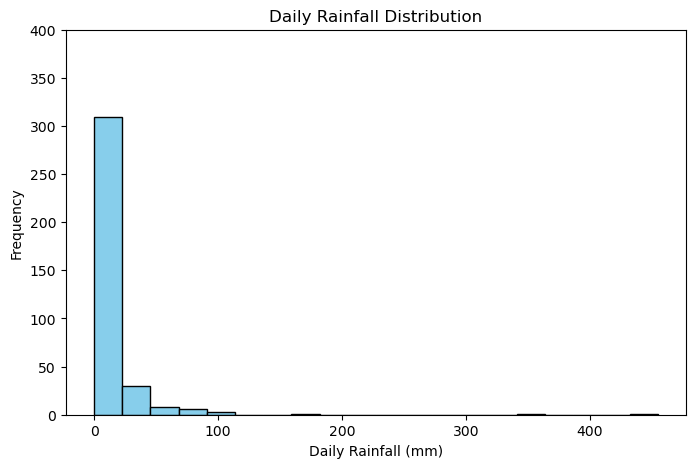

In [4]:
import matplotlib.pyplot as plt

# Histogram for Daily Rainfall
plt.figure(figsize=(8, 5))
plt.hist(df['DAILY RAINFALL'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Daily Rainfall Distribution')
plt.xlabel('Daily Rainfall (mm)')
plt.ylabel('Frequency')
plt.ylim(0,400)
plt.show()

### Questions

1. Describe the shape of the Daily Rainfall distribution. Is it symmetric, positively skewed, or negatively skewed? <br>
**The 'Daily Rainfall' distribution is positively skewed, with most values on the right side of the frequency distribution.**
2. How might the shape of the histogram reflect the frequency of rainy versus dry days?<br>
**The shape tells us the general frequency of the amount of rainfall an area recieves. A positively skewed graph such as the one shown indicates that the area generally recieves rainfall that are < 50 mm/day. If the graph is negatively skewed, then this means the area has more wet than dry days.**
3. What happens to the plot when you change the bins to 5? 20? 100? What scenarios would you need more bins? How about less bins?<br>
**The "resolution" of the histogram changes with differing bins. If there are too many values, then bins would need to be bigger to group the different values. Bins should not only match the sample size, but the standard deviation as well. If the standard deviation is bigger, then bins should be smaller, to account for the different nuances of the data, where the distribution might be wider.**

---
## Task 4. Analyze Rainy Days Only
Drop the days with zero rainfall and create a new histogram for `Daily Rainfall`. Compare this histogram to the one in Task 3 to see how excluding zero-rain days changes the distribution.


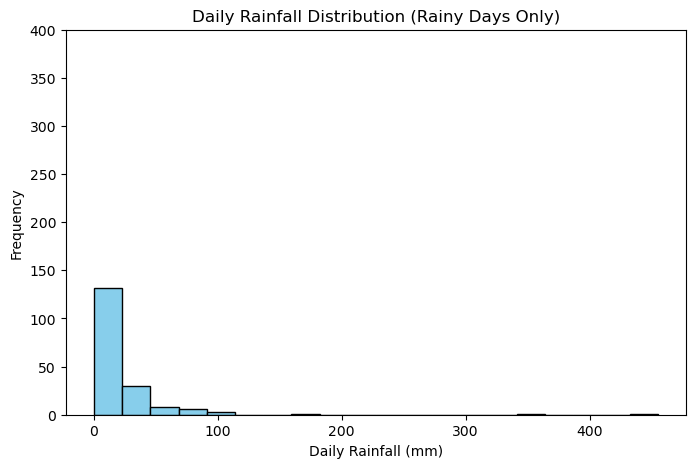

In [5]:
# Create a new DataFrame that only includes days with rainfall
rainy_days_df = df[df['DAILY RAINFALL'] > 0].copy()

# Plot histogram for Daily Rainfall (rainy days only)
plt.figure(figsize=(8, 5))
plt.hist(rainy_days_df['DAILY RAINFALL'], bins=20, color='skyblue', edgecolor='black')
plt.title('Daily Rainfall Distribution (Rainy Days Only)')
plt.xlabel('Daily Rainfall (mm)')
plt.ylabel('Frequency')
plt.ylim(0,400)
plt.show()

In [6]:
rainy_days_mean = rainy_days_df['DAILY RAINFALL'].mean()
rainy_days_median = rainy_days_df['DAILY RAINFALL'].median()

print(f"Mean Rainfall (rainy): {rainy_days_mean:.2f}")
print(f"Median Rainfall (rainy): {rainy_days_median:.2f}")

print(f"Mean Rainfall: {rainfall_mean:.2f}")
print(f"Median Rainfall: {rainfall_median:.2f}")

Mean Rainfall (rainy): 22.30
Median Rainfall (rainy): 7.49
Mean Rainfall: 11.30
Median Rainfall: 0.25


### Questions
1. How does this histogram differ from the previous histogram that included all days?<br>
**The bins containining 0 - 20 [mm] of rains has considerably dropped from ~300 days, to around ~140 days.**
2. How does excluding zero-rain days affect the mean and median of daily rainfall? HINT: compare `rainy_days_df['DAILY RAINFALL'].mean()` and `df['DAILY RAINFALL'].mean()`. Use additional cells if needed.<br>
**The mean is increased because of the exclusion of non-rainy days, and the median is also increased, with the same reason.**
3. In what scenarios might it be useful to exclude zero-rain days versus include them?<br>
**In the case of observing magnitudes of rains, looking only at rainy days - as opposed to both rainy and non-rainy days, will help us paint a better picture on the amount of rainfall. However, if the goal is to observe the amount of rainfall an area recieves at a certain time, including non-rainy days is better, but would have more effectiveness if averaged per season or per month.**

---
## Task 5: Cumulative Rainfall Over Time
Calculate the cumulative rainfall over time to observe how rainfall accumulates. Plot the cumulative rainfall to identify any trends or periods with significant rainfall.

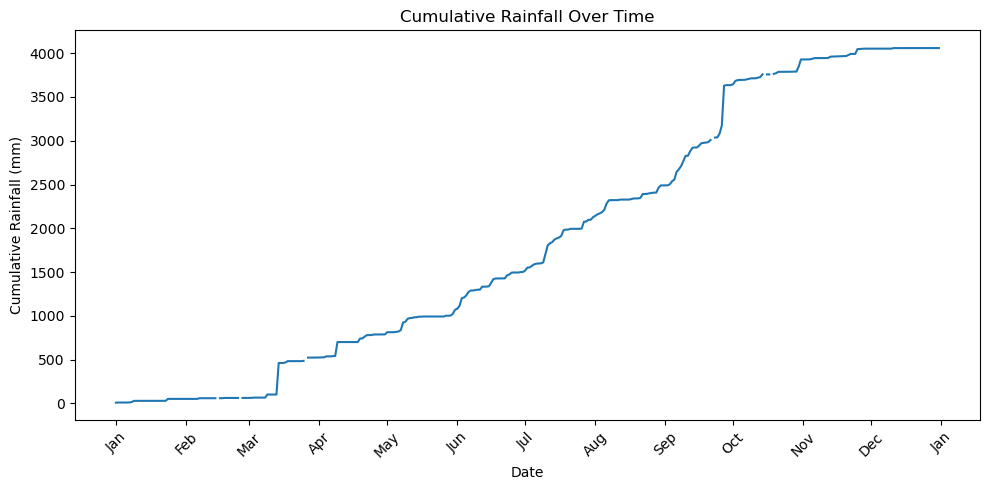

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Calculate cumulative rainfall
df['Cumulative Rainfall'] = df['DAILY RAINFALL'].cumsum()

# Plot cumulative rainfall over time with monthly x-axis ticks
plt.figure(figsize=(10, 5))
plt.plot(df['DATE'], df['Cumulative Rainfall'], color='tab:blue')
plt.title('Cumulative Rainfall Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Rainfall (mm)')

# Set x-axis to display months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Format as 'Month Year'

plt.xticks(rotation=45)  # Rotate labels for readability
plt.tight_layout()
plt.show()

### Questions

1. Describe the trend of cumulative rainfall over time. Are there any periods with rapid accumulation?<br>
**The cumulative rainfall increases over time, as it shows the accumulation of rain. There are notable times where the rainfall has an almost-vertical slope, such as mid March and late September, and also a generally high slope, around July to October.**
2. What could be some causes for sudden increases in cumulative rainfall?<br>
**The sudden increases could be extreme heavy rainfall events, like typhoons or local thunderstorms. The more gradual increases could be brought by long-term climactic events, like monsoons.**

---
## Task 6. Handling Outliers in Daily Rainfall
The `Daily Rainfall` data contains several extreme outliers and many zero-rain days. For this part of the exercise:

- First, filter the data to exclude zero-rain days.
- Then, filter out rainfall values above the 95th percentile to remove extreme outliers.
- Plot a new boxplot for the filtered data.
- Compare the summary statistics (mean and median) for:
    - All days (including zero-rain and outliers)
    - Rainy days only (excluding zero-rain)
    - Filtered rainy days (excluding zero-rain and the top 5% of rainfall values)

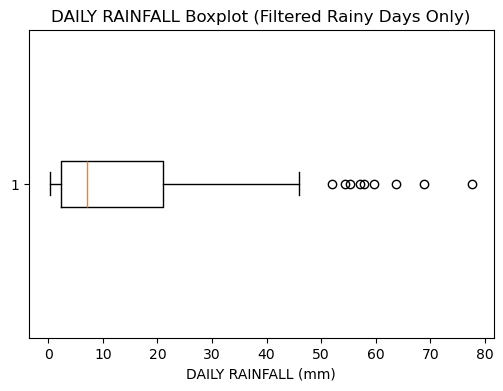

Summary Statistics:
Original Mean (All Days): 11.30 mm
Original Median (All Days): 0.25 mm

Mean (Rainy Days Only): 22.30 mm
Median (Rainy Days Only): 7.49 mm

Filtered Mean (Filtered Rainy Days Only): 14.26 mm
Filtered Median (Filtered Rainy Days Only): 7.11 mm


In [8]:
# Calculate the 95th percentile for DAILY RAINFALL (non-zero only)
threshold = df[df['DAILY RAINFALL'] > 0]['DAILY RAINFALL'].quantile(0.95)

# Filter data to exclude zero-rain days
rainy_days_df = df[df['DAILY RAINFALL'] > 0]

# Further filter to exclude outliers above the 95th percentile
filtered_rainy_days_df = rainy_days_df[rainy_days_df['DAILY RAINFALL'] <= threshold]

# Plot boxplot for filtered DAILY RAINFALL data (rainy days only, no extreme outliers)
plt.figure(figsize=(6, 4))
plt.boxplot(filtered_rainy_days_df['DAILY RAINFALL'], vert=False)
plt.title('DAILY RAINFALL Boxplot (Filtered Rainy Days Only)')
plt.xlabel('DAILY RAINFALL (mm)')
plt.show()

# Summary statistics
# All days (with zeros and outliers)
original_mean = df['DAILY RAINFALL'].mean()
original_median = df['DAILY RAINFALL'].median()

# Rainy days only (no zeros, but includes outliers)
rainy_mean = rainy_days_df['DAILY RAINFALL'].mean()
rainy_median = rainy_days_df['DAILY RAINFALL'].median()

# Filtered rainy days only (no zeros, no extreme outliers)
filtered_mean = filtered_rainy_days_df['DAILY RAINFALL'].mean()
filtered_median = filtered_rainy_days_df['DAILY RAINFALL'].median()

print("Summary Statistics:")
print(f"Original Mean (All Days): {original_mean:.2f} mm")
print(f"Original Median (All Days): {original_median:.2f} mm\n")
print(f"Mean (Rainy Days Only): {rainy_mean:.2f} mm")
print(f"Median (Rainy Days Only): {rainy_median:.2f} mm\n")
print(f"Filtered Mean (Filtered Rainy Days Only): {filtered_mean:.2f} mm")
print(f"Filtered Median (Filtered Rainy Days Only): {filtered_median:.2f} mm")


### Questions
1. Are there any outliers in the `Daily Rainfall` data? If so, what might they represent?<br>
**Outliers in daily rainfall consist of strong rains (that are within the 95th percentile). These indicate rains that are not included in the general population.**
2. How might these outliers affect the mean and median values of rainfall?<br>
**Outliers skew the the data by introducing measures of high (or low) magnitudes. Because of this, the mean might increase (or decrease) unreasonably. However, depending on the number of observations, the median might not change a lot, because the median describes the middle of the frequency.**
3. How do zero-rain days affect the mean and median of rainfall?<br>
**Zero-rain days greatly lower the mean, because there are many values of zero that will get averaged out. Because there are also a considerable number of non-rainy days, the median will shift to the left.**
4. After filtering out both zero-rain days and the top 5% of rainfall values, how did the mean and median change? What does this suggest about the influence of zero values and extreme values on rainfall statistics?<br>
**Filtering out zero-dain days and the top 5% values ensures us that the distribution will be closer to normal, with values we can explain up to a fault. These filters ensure us that the statistics we present are accurate (for most average cases).**

---
## Task 7: Scatter Plot - Temperature vs Rainfall
From the `filtered_rainy_days_df` dataframe, create a scatter plot of `TEMP MEAN` vs. `Daily Rainfall` to explore if there’s any relationship between temperature and rainfall.

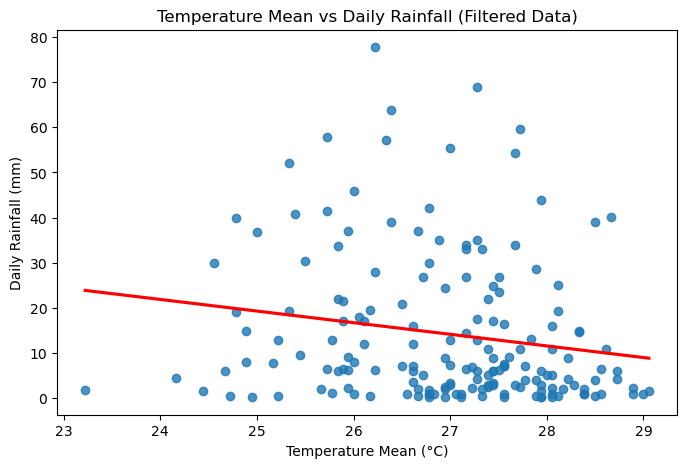

Pearson's Correlation Coefficient: -0.18
P-value: 0.021


In [9]:
import seaborn as sns
from scipy.stats import pearsonr

# Scatter plot with trend line
plt.figure(figsize=(8, 5))
sns.regplot(x='TEMP MEAN', y='DAILY RAINFALL', data=filtered_rainy_days_df, ci=None, line_kws={"color": "red"})
plt.title("Temperature Mean vs Daily Rainfall (Filtered Data)")
plt.xlabel("Temperature Mean (°C)")
plt.ylabel("Daily Rainfall (mm)")
plt.show()

# Calculate Pearson's correlation coefficient
pearson_corr, p_value = pearsonr(filtered_rainy_days_df['TEMP MEAN'], filtered_rainy_days_df['DAILY RAINFALL'])
print(f"Pearson's Correlation Coefficient: {pearson_corr:.2f}")
print(f"P-value: {p_value:.3f}")

### Questions
1. What is Pearson’s correlation coefficient between TEMP MEAN and Daily Rainfall? Is it positive, negative, or close to zero?<br>
**The Pearson's Correlation Coefficient is -0.18, which means an increase in mean temperature is correlated with a decrease in rainfall.**
2. Based on the correlation coefficient and the trend line, do you observe a meaningful relationship between temperature and rainfall for moderate rainy days?<br>
**The p-value indicates that there is a good correlation (at a 5% significance) between the two variables. This fact, combined with the Pearson's Correlation Coefficient would mean that there is a weak but good negative correlation between temperature and daily rainfall. A highe**
3. How does the trend line help in visualizing the relationship, or lack thereof, between temperature and rainfall?<br>
**The trend line shows how strongly the behavior of one variable can be correlated (but not caused) by the other variable, with a steeper slope indicating a stronger effect on the other. If the line were purely horizontal, then the change in temperature is not related with the amount of rainfall at all.**

---
## Task 8: Exploring Seasonal Rainfall Patterns
Group the `Daily Rainfall` data by month to observe seasonal patterns. Calculate the mean rainfall for each month and plot it to see how rainfall changes over the year.

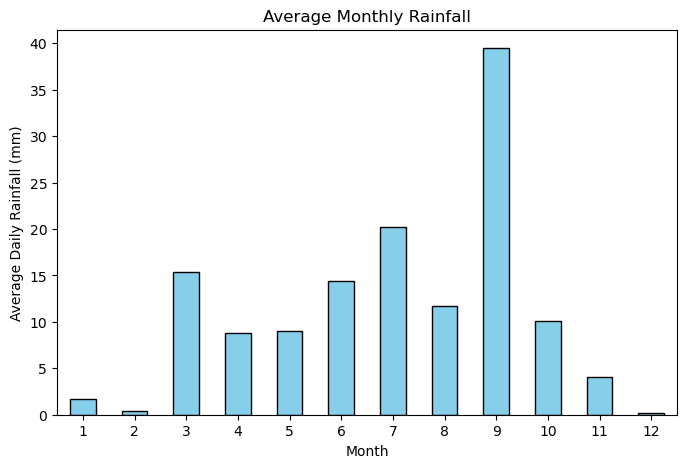

In [10]:
# Convert 'DATE' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')  # 'errors=coerce' handles any invalid dates by setting them to NaT

# Add a 'Month' column based on the DATE
df['Month'] = df['DATE'].dt.month

# Calculate mean monthly rainfall
monthly_rainfall = df.groupby('Month')['DAILY RAINFALL'].mean()

# Plot mean monthly rainfall
plt.figure(figsize=(8, 5))
monthly_rainfall.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Monthly Rainfall")
plt.xlabel("Month")
plt.ylabel("Average Daily Rainfall (mm)")
plt.xticks(rotation=0)
plt.show()

### Questions
1. Which month(s) have the highest average rainfall? What might be causing this seasonal pattern?<br>
**September has the highest amount of rainfall, when compared to the other months. This could be caused by a combination of the occurence of the Southwest Monsoon bringing monsoonal rainfall, and September being one of the months where the Philippines experiences the most amount of typhoon development.**
2. How does the seasonal variation in rainfall align with your expectations of the climate type for the region?<br>
**The plot shows how there are dry and wet months in the area (Science Garden). This agrees with the general climate classification of the area (Modified Coronas Classification), where there are two pronounced seasons.**

---
## Task 9: Exploring Seasonal Temperature Patterns
Create new cells below and repeat Task 8 but for Mean, Minimum, and Maximum temperature. 

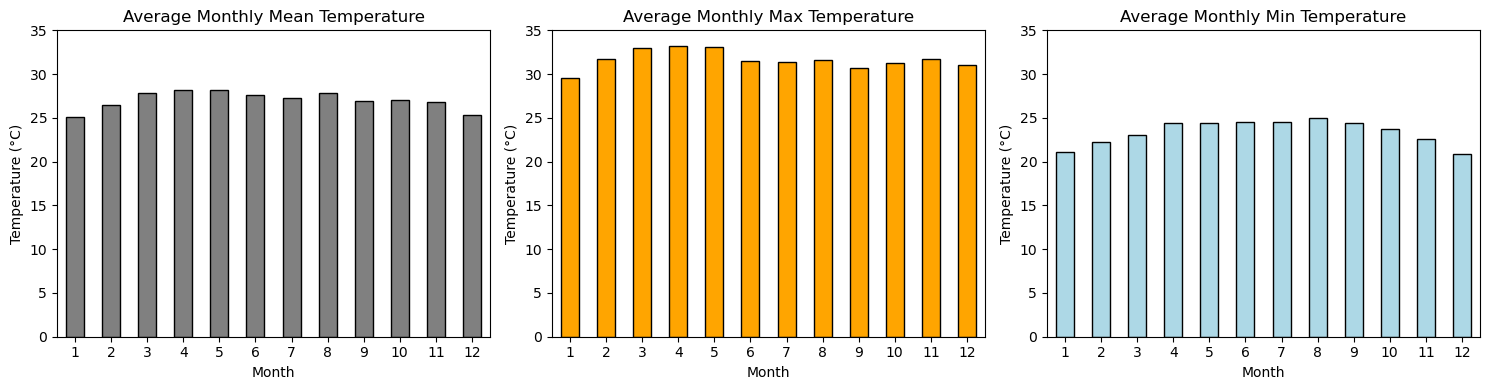

In [11]:
# Convert 'DATE' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')  # 'errors=coerce' handles any invalid dates by setting them to NaT

# Add a 'Month' column based on the DATE
df['Month'] = df['DATE'].dt.month

# Calculate mean monthly rainfall
monthly_mean_temp = df.groupby('Month')['TEMP MEAN'].mean()
monthly_max_temp = df.groupby('Month')['TEMP MAX'].mean()
monthly_min_temp = df.groupby('Month')['TEMP MIN'].mean()

fig, axs = plt.subplots(1, 3, figsize=(15, 4))  # 1 row, 3 columns

monthly_mean_temp.plot(kind='bar', color='gray', edgecolor='black', ax=axs[0])
axs[0].set_title('Average Monthly Mean Temperature')

monthly_max_temp.plot(kind='bar', color='orange', edgecolor='black', ax=axs[1])
axs[1].set_title('Average Monthly Max Temperature')

monthly_min_temp.plot(kind='bar', color='lightblue', edgecolor='black', ax=axs[2])
axs[2].set_title('Average Monthly Min Temperature')

for ax in axs:
    ax.set_xlabel('Month')
    ax.set_ylabel('Temperature (°C)')
    ax.set_ylim(0, 35)
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

### Questions
1. Which month(s) have the highest maximum temperature? Lowest minimum temperature? What might be causing this seasonal pattern?<br>
**The highest maximum temperature is exhibited by Mar-Apr-May, while the lowest temperatures are shown by Nov-Dec-Jan-Feb. The tilt of the Earth is the possible main driver of this seasonal trend. During Mar-Apr-May, the angle of the Earth exposes the Philippines to the most amount of energy. During Nov-Dec-Jan-Feb, since the sun hits the lower part of the planet, northern winds go downards, passing by Philippines, lowering its minimum temperature. However, since we are a tropical country. the differences are not as drastic as it is in the extreme upper/higher atmosphere**

---

### Final Questions
1. Did you notice any clear seasonal patterns or shifts in the data? (e.g., sudden increases in rain, changes in temperature ranges, etc.)<br>
**There are sudden increases in rain that is most obvious when looking at the cumulative rainfall. These indicate times of the southwest monsoon, and possible high cyclogenesis. The temperature is more subtle, but there is general higher temperature in the middle of the year, where 'summer' is likely.**
2. Are there any "unusual" days in the data?
    - What variables made them stand out? <br>
**Rainfall has most recordings that stand out - because of the presence of outliers in both directions of the frequency plot (no rain and strong rain).**
    - How would you check if they were real or just data entry errors?<br>
**Cross-referencing these data with other sources or recordings from other years might be able to verify these readings.**
3. If you had to describe this year’s weather to someone who didn't live through it, what key patterns or features would you mention?<br>
**In the year 2009, temperature was generally stable, exhibiting an increase and decrease in specific seasons. Rainfall is most prominent in September, most probably brought about by local storms from tpyhoons or monsoon drivers. There are also outliers of rain from 200-400 mm, occuring around March and October.**
4. What questions can we answer confidently with one year of data? What kinds of questions would require more years for better context?<br>
**We can see that temperature has a weak correlation to rainfall - although more data could support this claim. We can tell from the data which rain events are outliers, and which are normal to the area. We can also see wet/rainy seasons, but similarly to temperature, could benefit from more years of data.**
5. Which variable would you want to visualize next, and what would you hope to find?<br>
**Wind speed would be interesting data to visualize, since wind speed is generally erratic. Applying statistical techniques to it could aslo help with its interpretation.**